In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kidney-disease-dataset/kidney_disease_dataset.csv


## **Introduction**

**Problem Statement**

Chronic Kidney Disease (CKD) is a significant global health issue that often progresses silently until advanced stages, therefore, early detection and accurate classification of CKD stages can improve patient outcomes through timely interventions. The provided Kidney Disease Dataset contains a comprehensive set of clinical, biochemical, and lifestyle features that ultimately lead to the onset of the disease. These fearures make the dataset ideal for developing machine learning models that predict CKD presence or risk level. With that in mind, it is our challenge to build a robust model that accurately classifies patients into categories such as "No_Disease," "Low_Risk," or other CKD stages based on the provided features.

**Objective**

The objective of this project is to develop a machine learning model that predicts the presence or risk level of CKD using the Kidney Disease Dataset. The model will leverage the 43 features to classify patients accurately, and we hope to achieve high precision, recall, and F1-score, particularly for identifying at-risk individuals. 

**Steps**

1. **Data Preprocessing:** Clean and prepare the dataset by handling categorical variables, scaling numerical features, and splitting the data into training and testing sets.
2. **Exploratory Data Analysis (EDA):** Analyze the dataset to uncover patterns, correlations, and feature importance.
3. **Feature Engineering:** Select relevant features and create new ones to enhance model performance.
4. **Model Training:** Train multiple machine learning models and tune hyperparameters to optimize performance.
5. **Model Evaluation:** Evaluate models using appropriate metrics and select the best-performing model.
6. **Conclusion and Future Work:** Summarize findings and suggest improvements.

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [41]:
# load data
df = pd.read_csv('/kaggle/input/kidney-disease-dataset/kidney_disease_dataset.csv')
df.head()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


In [42]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20538 non-null  int64  
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20538 non-null  int64  
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20538 non-null  object 
 6   Pus cells in urine                           20538 non-null  object 
 7   Pus cell clumps in urine                     20538 non-null  object 
 8   Bacteria in urine                            20538 non-null  object 
 9   Random blood glucose level (mg/dl)           20538 non-null  int64  
 10

In [43]:
# check null values
df.isnull().sum()

Age of the patient                             0
Blood pressure (mm/Hg)                         0
Specific gravity of urine                      0
Albumin in urine                               0
Sugar in urine                                 0
Red blood cells in urine                       0
Pus cells in urine                             0
Pus cell clumps in urine                       0
Bacteria in urine                              0
Random blood glucose level (mg/dl)             0
Blood urea (mg/dl)                             0
Serum creatinine (mg/dl)                       0
Sodium level (mEq/L)                           0
Potassium level (mEq/L)                        0
Hemoglobin level (gms)                         0
Packed cell volume (%)                         0
White blood cell count (cells/cumm)            0
Red blood cell count (millions/cumm)           0
Hypertension (yes/no)                          0
Diabetes mellitus (yes/no)                     0
Coronary artery dise

In [44]:
# check for duplicates
df.duplicated().sum()

0

In [45]:
# view summary statistics of numerical variables
df.describe()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Random blood glucose level (mg/dl),Blood urea (mg/dl),Serum creatinine (mg/dl),Sodium level (mEq/L),Potassium level (mEq/L),...,Cholesterol level,Parathyroid hormone (PTH) level,Serum calcium level,Serum phosphate level,Body Mass Index (BMI),Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level
count,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,...,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000
mean,47.477895,130.352079,1.015041,2.501266,2.494595,284.630295,104.094240,7.781865,135.076646,4.992314,...,200.236440,40.265400,9.001840,4.241157,27.544240,14.918152,14.946879,1.749459,5.061633,7.702504
std,24.941947,29.063838,0.005793,1.697084,1.701059,124.633265,55.726482,4.179925,8.651000,0.871026,...,57.863374,17.310488,0.867301,1.006735,7.221082,8.963722,8.945500,0.718980,2.853217,4.191765
min,5.000000,80.000000,1.005000,0.000000,0.000000,70.000000,7.002370,0.500000,120.000613,3.500005,...,100.000000,10.000045,7.500000,2.500000,15.000000,0.000000,0.000000,0.500000,0.100000,0.500000
25%,26.000000,105.000000,1.010000,1.000000,1.000000,176.000000,55.864665,4.200000,127.563468,4.229885,...,150.000000,25.396841,8.250000,3.380000,21.300000,7.000000,7.000000,1.130000,2.600000,4.050000
50%,47.000000,131.000000,1.015000,3.000000,2.000000,284.500000,104.401355,7.780000,135.044974,4.990991,...,200.000000,40.423386,8.990000,4.230000,27.600000,15.000000,15.000000,1.750000,5.070000,7.710000
75%,69.000000,156.000000,1.020000,4.000000,4.000000,393.000000,152.480048,11.430000,142.607311,5.749899,...,250.000000,55.272665,9.750000,5.110000,33.800000,23.000000,23.000000,2.370000,7.537500,11.297500
max,90.000000,180.000000,1.025000,5.000000,5.000000,500.000000,199.994361,15.000000,149.999914,6.499827,...,300.000000,69.999871,10.500000,6.000000,40.000000,30.000000,30.000000,3.000000,10.000000,15.000000


## **Data Preprocessing**

Data preprocessing  ensures the dataset is clean, consistent, and formatted for model training. Proper preprocessing mitigates issues like biased models due to unscaled features or mishandled categorical variables thereby improving model accuracy and robustness.

**Steps**

1. Encode categorical variables using one-hot encoding or label encoding, depending on the feature.
2. Scale numerical features to standardize their ranges.
3. Split the dataset into training (80%) and testing (20%) sets to evaluate model generalization.

In [46]:
# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

In [47]:
# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [48]:
# Scale numerical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [49]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Exploratory Data Analysis**

EDA will help reveal which clinical and lifestyle factors (e.g., eGFR, serum creatinine, BMI) are most correlated with CKD stages. This will further guide feature selection, and highlight potential data imbalances.

In [50]:
# Combine X_train and y_train for EDA
train_df = X_train.copy()
train_df['Target'] = y_train

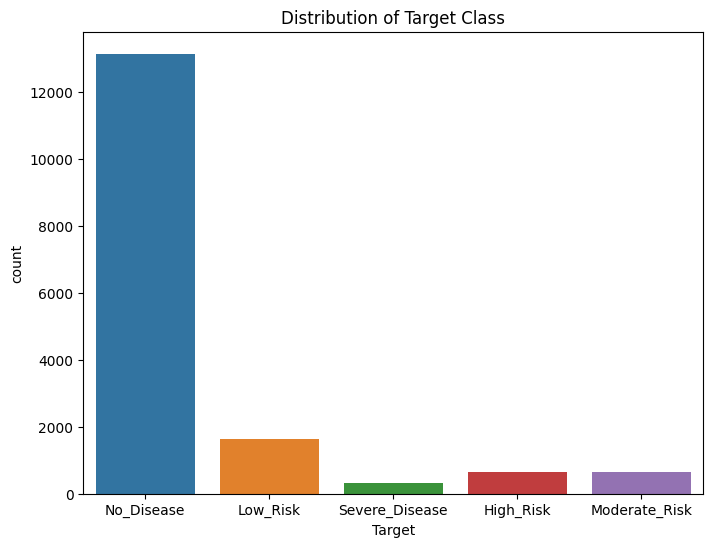

In [51]:
# Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=train_df)
plt.title('Distribution of Target Class')
plt.show()

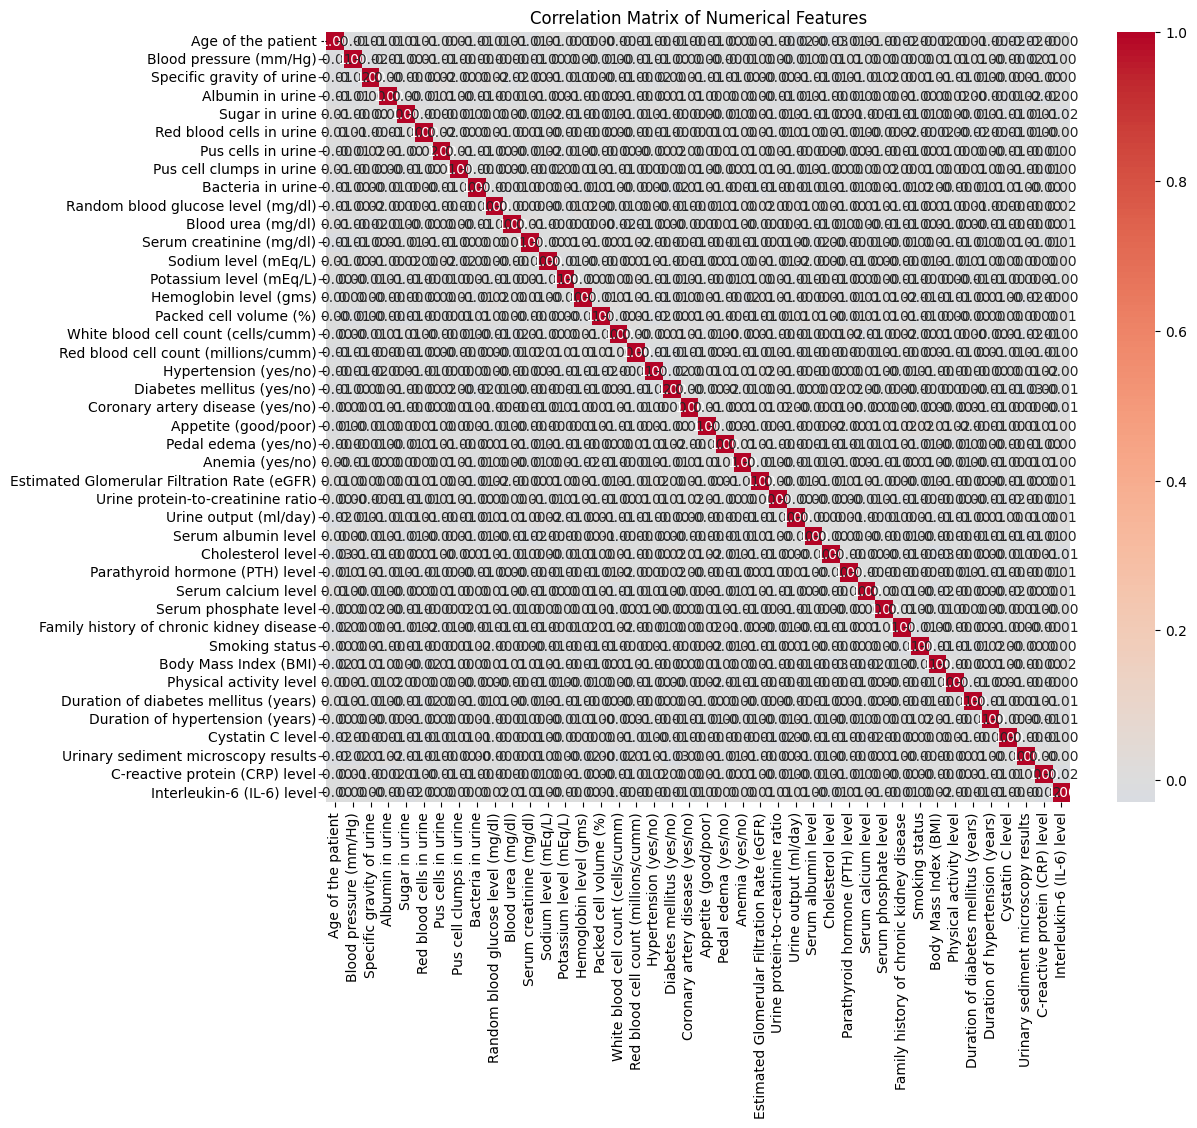

In [52]:
# Correlation analysis for numerical features
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 10))
corr_matrix = train_df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

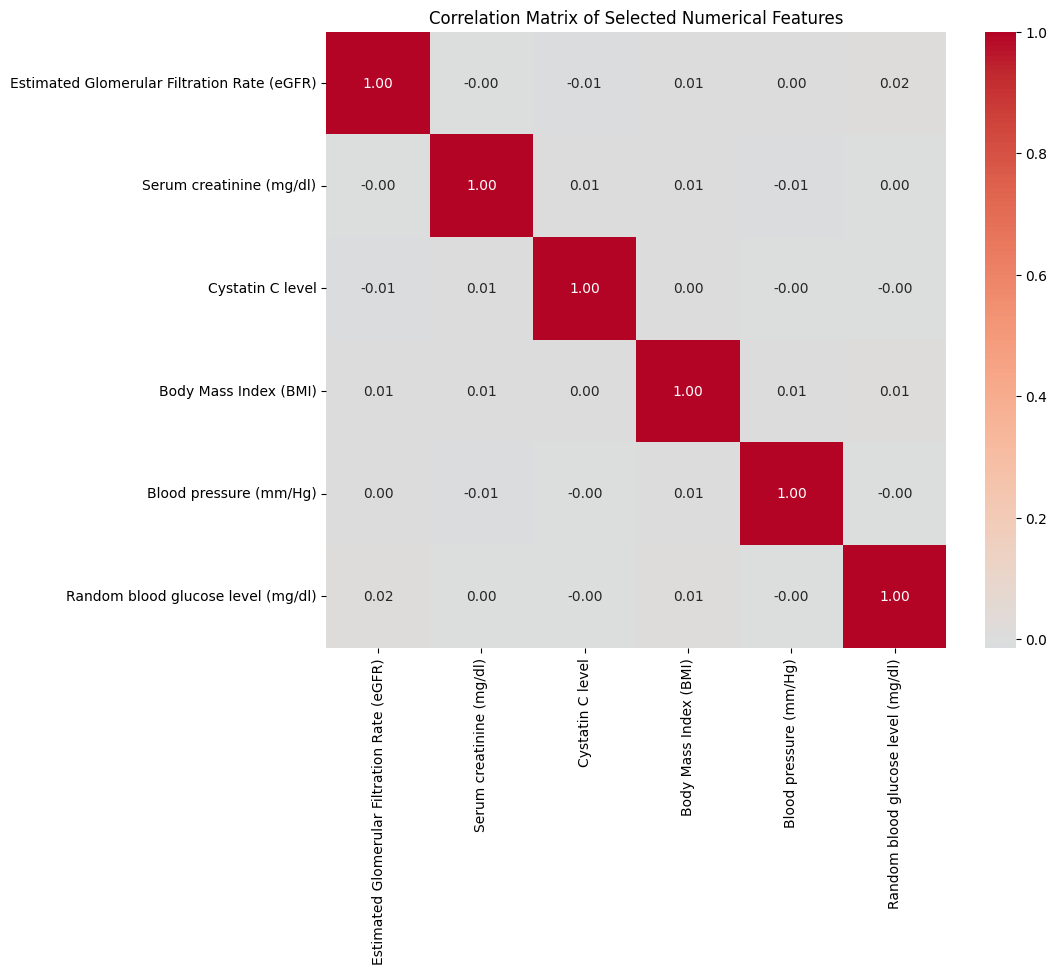

In [53]:
# Correlation analysis for selected numerical features
key_numerical_cols = [
    'Estimated Glomerular Filtration Rate (eGFR)',
    'Serum creatinine (mg/dl)',
    'Cystatin C level',
    'Body Mass Index (BMI)',
    'Blood pressure (mm/Hg)',
    'Random blood glucose level (mg/dl)'
]
plt.figure(figsize=(10, 8))
corr_matrix = train_df[key_numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Selected Numerical Features')
plt.show()

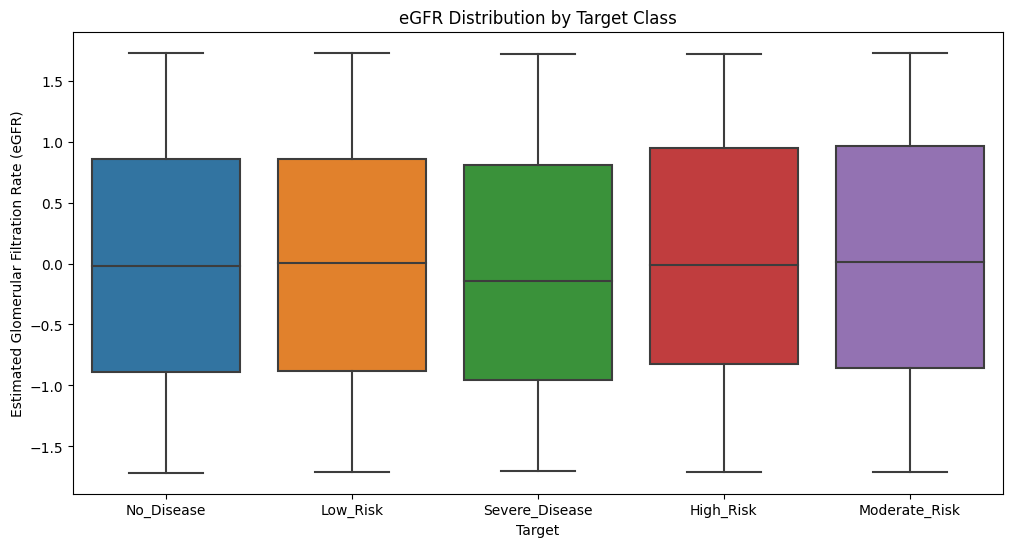

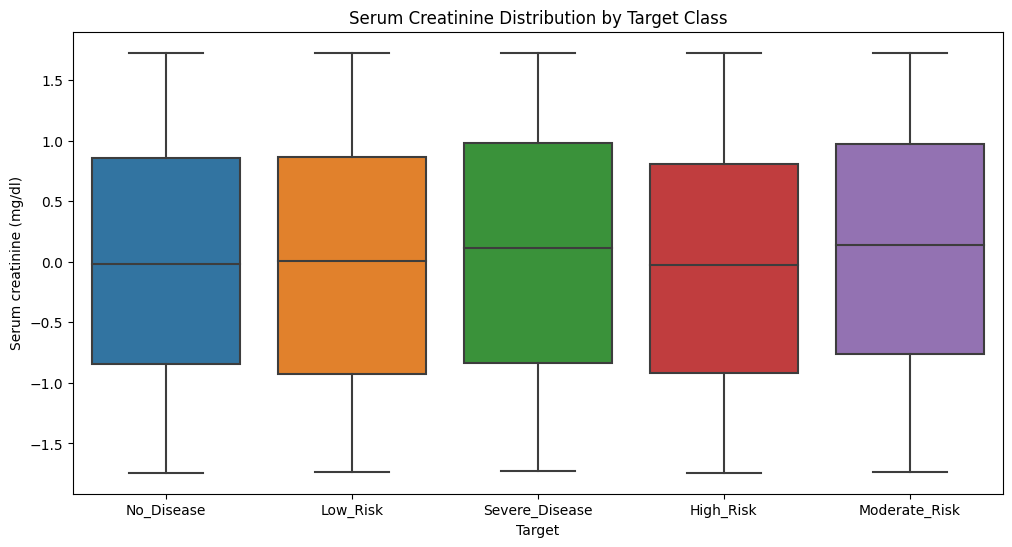

In [54]:
# Key feature analysis: eGFR and Serum creatinine vs Target
plt.figure(figsize=(12, 6))
sns.boxplot(x='Target', y='Estimated Glomerular Filtration Rate (eGFR)', data=train_df)
plt.title('eGFR Distribution by Target Class')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Target', y='Serum creatinine (mg/dl)', data=train_df)
plt.title('Serum Creatinine Distribution by Target Class')
plt.show()

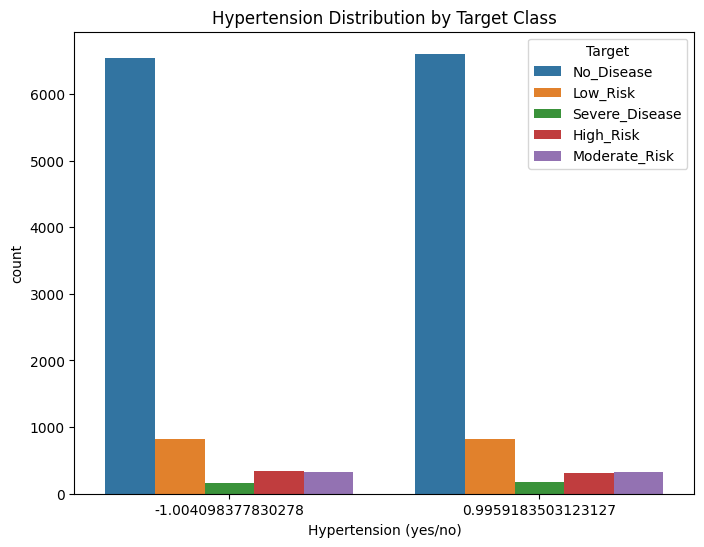

In [55]:
# Categorical feature analysis: Hypertension vs Target
plt.figure(figsize=(8, 6))
sns.countplot(x='Hypertension (yes/no)', hue='Target', data=train_df)
plt.title('Hypertension Distribution by Target Class')
plt.show()

In [56]:
# Summary statistics for key biomarkers
key_features = ['Estimated Glomerular Filtration Rate (eGFR)', 'Serum creatinine (mg/dl)', 'Cystatin C level']
print("Summary Statistics for Key Biomarkers:")
print(train_df[key_features].describe())

Summary Statistics for Key Biomarkers:
       Estimated Glomerular Filtration Rate (eGFR)  Serum creatinine (mg/dl)  \
count                                 16430.000000              16430.000000   
mean                                     -0.006498                 -0.003292   
std                                       1.000637                  0.998721   
min                                      -1.715989                 -1.742147   
25%                                      -0.884175                 -0.854549   
50%                                      -0.016530                 -0.007623   
75%                                       0.863408                  0.862629   
max                                       1.732101                  1.726900   

       Cystatin C level  
count      16430.000000  
mean           0.001444  
std            0.998820  
min           -1.737864  
25%           -0.847692  
50%            0.000752  
75%            0.863106  
max            1.739368  


#### **Analysis of EDA Results**

1. **Target Distribution:**

    - **Class Imbalance:** The target variable is highly imbalanced, with "No_Disease" dominating, followed by "Low_Risk" (2,000), "Moderate_Risk" and "High_Risk", and "Severe_Disease". This imbalance suggests that models may bias toward "No_Disease" unless addressed (e.g., using class weights, oversampling, or stratified metrics like F1-score).
    - **Implication:** The low sample counts for "Moderate_Risk," "High_Risk," and "Severe_Disease" may challenge model learning for these classes, necessitating techniques to handle minority classes.
      

2. **Correlation Matrix:**

    - **Weak Correlations:** All correlations are near zero (-0.01 to 0.02), indicating no strong linear relationships among key numerical features (e.g., eGFR, serum creatinine, Cystatin C, BMI, blood pressure, glucose).
    - **eGFR and Serum Creatinine:** The near-zero correlation between eGFR and serum creatinine is surprising, as they are clinically related (eGFR is often derived from creatinine). This could be due to standardization or non-linear relationships not captured by Pearson correlation.
    - **Implication:** The lack of strong linear correlations suggests that linear models may struggle, and we may need non-linear models (e.g., Random Forest, XGBoost) or feature transformations to capture relationships.
    
4. **eGFR Boxplot:**
    - **Limited Discrimination:** eGFR distributions are similar across target classes, with only slightly lower medians for "Severe_Disease" and "High_Risk." The substantial overlap in interquartile ranges (IQRs) indicates that eGFR alone has limited discriminatory power.
    - **Implication:** eGFR’s standardized values may obscure its clinical significance. We may need to derive new features (e.g., eGFR thresholds based on CKD stages) to enhance its predictive power.

5. **Serum Creatinine Boxplot:**
    - **Similar Trend:** Serum creatinine shows comparable distributions across classes, with a slightly higher median for "Severe_Disease," consistent with its role as a marker of kidney dysfunction.
    - **Overlap Issue:** The significant overlap in distributions suggests that serum creatinine alone is not a strong predictor in its current form.
    - **Implication:** Like eGFR, serum creatinine may benefit from feature engineering, such as binning into clinically relevant ranges or combining with other features.


6. **Hypertension Countplot:**
    - **Mirrors Target Distribution:** The distribution of hypertension across target classes follows the target distribution, with most samples in "No_Disease." This suggests hypertension is not a strong differentiator in its current encoded form.
    - **Implication:** Hypertension’s predictive power may be diluted by class imbalance. Interaction terms (e.g., hypertension with duration of hypertension) could uncover more nuanced relationships.


7. **Summary Statistics for Key Biomarkers:**
    - **Standardized Features:** The mean values for eGFR, serum creatinine, and Cystatin C are near zero, and standard deviations are ~1, confirming successful standardization during preprocessing.
    - **Range and Spread:** The min/max values (e.g., eGFR: -1.72 to 1.73) show that features are scaled consistently, but the lack of significant differences in medians/IQRs across classes aligns with the boxplot findings.
    - **Implication:** The biomarkers’ standardized forms may not capture clinical thresholds (e.g., eGFR < 60 for CKD). Feature engineering will be critical to align features with medical guidelines.

## **Feature Engineering**

Here we will:
- Bin eGFR into CKD stages (e.g., Stage 1: ≥90, Stage 2: 60–89, etc.) based on clinical guidelines.
- Create interaction terms (e.g., hypertension × duration of hypertension) to capture combined effects.
- Apply Synthetic Minority Oversampling Technique (SMOTE) to balance the training set, addressing the scarcity of "Severe_Disease" and other minority classes.
- Use Random Forest feature importance to identify the top features, reducing dimensionality and focusing on predictors with high discriminatory power.

In [57]:
# 1. Create clinically relevant features
def bin_egfr(egfr):
    """Bin eGFR into CKD stages (standardized values based on EDA quantiles)."""
    if egfr >= 0.86:  # Top 25% (75th percentile)
        return 'Stage_1'
    elif 0 <= egfr < 0.86:
        return 'Stage_2'
    elif -0.88 <= egfr < 0:
        return 'Stage_3'
    elif -1.72 <= egfr < -0.88:
        return 'Stage_4'
    else:
        return 'Stage_5'

X_train['eGFR_Stage'] = X_train['Estimated Glomerular Filtration Rate (eGFR)'].apply(bin_egfr)
X_test['eGFR_Stage'] = X_test['Estimated Glomerular Filtration Rate (eGFR)'].apply(bin_egfr)

In [58]:
# Create interaction term
X_train['Hypertension_Duration'] = X_train['Hypertension (yes/no)'] * X_train['Duration of hypertension (years)']
X_test['Hypertension_Duration'] = X_test['Hypertension (yes/no)'] * X_test['Duration of hypertension (years)']

In [59]:
# Encode new categorical feature
X_train = pd.get_dummies(X_train, columns=['eGFR_Stage'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['eGFR_Stage'], drop_first=True)

In [60]:
# 2. Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [61]:
# 3. Feature selection using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select top 20 features
top_features = feature_importance['Feature'].head(20).tolist()
X_train_selected = X_train_balanced[top_features]
X_test_selected = X_test[top_features]

In [62]:
# 4. Verify transformed data
print("Balanced Training Set Class Distribution:")
print(y_train_balanced.value_counts())
print("\nTop 20 Features:")
print(feature_importance.head(20))
print("\nShape of Transformed Training Set:", X_train_selected.shape)
print("Shape of Transformed Testing Set:", X_test_selected.shape)

Balanced Training Set Class Distribution:
Target
No_Disease        13145
Low_Risk          13145
Severe_Disease    13145
High_Risk         13145
Moderate_Risk     13145
Name: count, dtype: int64

Top 20 Features:
                                        Feature  Importance
3                              Albumin in urine    0.030748
4                                Sugar in urine    0.029981
35                      Physical activity level    0.027858
31                        Serum phosphate level    0.026378
36        Duration of diabetes mellitus (years)    0.026366
41                   Interleukin-6 (IL-6) level    0.026088
10                           Blood urea (mg/dl)    0.026064
37             Duration of hypertension (years)    0.025986
42                        Hypertension_Duration    0.025910
15                       Packed cell volume (%)    0.025847
30                          Serum calcium level    0.025807
26                        Urine output (ml/day)    0.025797
34     

#### **Analysis of Feature Engineering Results**

1. **Balanced Training Set Class Distribution:**
    - SMOTE equalized the classes, with each target class ("No_Disease," "Low_Risk," "Moderate_Risk," "High_Risk," "Severe_Disease") now having 13,145 samples. This addresses the severe class imbalance observed in EDA (e.g., "Severe_Disease" < 500 samples).
    - **Implication:** The balanced dataset should improve model performance on minority classes, ensuring better recall for "Severe_Disease" and "High_Risk," which are critical for CKD prediction.
Training Set Size: The training set expanded to 65,725 samples (13,145 × 5 classes), reflecting SMOTE’s oversampling of minority classes.
2. **Top 20 Features:**
    - **Diverse Feature Importance:** The top features include clinical biomarkers (e.g., albumin in urine, blood urea, eGFR), lifestyle factors (e.g., physical activity level, BMI), and derived features (e.g., Hypertension_Duration). Importance scores are relatively close (0.0256–0.0307), suggesting no single feature dominates.
    - **Key Biomarkers:** Albumin in urine (0.0307) and sugar in urine (0.0299) rank highest, consistent with their clinical relevance in kidney function assessment. eGFR (0.0258) and serum creatinine (0.0257) are also included, though lower than expected, possibly due to standardization or binning.
    - **Derived Feature:** Hypertension_Duration (0.0259) appears in the top 20, indicating that the interaction between hypertension and its duration is predictive, validating our feature engineering approach.
    - **eGFR Stages:** The eGFR_Stage dummy variables (e.g., eGFR_Stage_Stage_2, etc.) are not in the top 20, suggesting that the binned eGFR may not have added significant predictive power over the raw eGFR value. This could be due to the approximate quantiles used for binning.
    - **Implication:** The selected features cover a broad range of clinical and lifestyle factors, suitable for a robust CKD prediction model. The absence of eGFR_Stage variables suggests we may revisit binning with clinical thresholds in future iterations.
3. **Shapes of Transformed Datasets:**
    - The transformed training set has 65,725 samples and 20 features, confirming feature selection reduced the dimensionality from 46 (42 original + 1 Hypertension_Duration + 4 eGFR_Stage dummies) to 20.
    - The testing set retains 4,108 samples with 20 features, matching the selected features from the training set, ensuring consistency for model evaluation.
    - **Implication:** The reduced feature set should improve computational efficiency and reduce overfitting risk, while SMOTE’s expansion ensures sufficient data for learning minority class patterns.

## **Model Selection**

To do:
- Train three models: Random Forest (robust for imbalanced data), XGBoost (high performance with gradient boosting), and Logistic Regression (baseline linear model).
- Use GridSearchCV to tune key hyperparameters for each model, optimizing for the F1-score (macro-averaged) to balance precision and recall across classes.
- Fit models on the balanced training set (X_train_selected, y_train_balanced).
- Compute training and testing F1-scores to assess performance and check for overfitting.
- Output model performance metrics for comparison.

In [63]:
# Encode target variable for XGBoost (requires numerical labels)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_balanced)
y_test_encoded = le.transform(y_test)

In [64]:
# Define models and parameter grids
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, eval_metric='mlogloss'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.1, 0.3]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear']
        }
    }
}

In [65]:
# Train and tune models
results = {}
for name, model_info in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        scoring='f1_macro',
        cv=5,
        n_jobs=-1
    )
    # Use encoded labels for XGBoost, original for others
    y_train_use = y_train_encoded if name == 'XGBoost' else y_train_balanced
    grid_search.fit(X_train_selected, y_train_use)
    
    # Best model
    best_model = grid_search.best_estimator_
    
    # Predictions
    y_train_pred = best_model.predict(X_train_selected)
    y_test_pred = best_model.predict(X_test_selected)
    
    # Convert predictions back to original labels for XGBoost
    if name == 'XGBoost':
        y_train_pred = le.inverse_transform(y_train_pred)
        y_test_pred = le.inverse_transform(y_test_pred)
    
    # Compute F1-scores
    train_f1 = f1_score(y_train_balanced, y_train_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    # Store results
    results[name] = {
        'best_params': grid_search.best_params_,
        'train_f1': train_f1,
        'test_f1': test_f1
    }

Training RandomForest...
Training XGBoost...
Training LogisticRegression...


In [66]:
# 3. Print results
print("\nModel Performance:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Best Parameters: {metrics['best_params']}")
    print(f"Training F1-Score (Macro): {metrics['train_f1']:.4f}")
    print(f"Testing F1-Score (Macro): {metrics['test_f1']:.4f}")


Model Performance:

RandomForest:
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Training F1-Score (Macro): 1.0000
Testing F1-Score (Macro): 0.1831

XGBoost:
Best Parameters: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 200}
Training F1-Score (Macro): 0.9961
Testing F1-Score (Macro): 0.1773

LogisticRegression:
Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Training F1-Score (Macro): 0.2470
Testing F1-Score (Macro): 0.0916


1. **Random Forest:**
    - **Best Parameters:** {'max_depth': None, 'n_estimators': 200} suggests the model favors a deep, complex tree structure with more estimators, which can lead to overfitting.
    - **Training F1-Score (Macro):** 1.0000 indicates perfect performance on the training set, likely because the model memorized the SMOTE-generated data.
    - **Testing F1-Score (Macro):** 0.1831 is extremely low, showing poor generalization to the test set. The large gap (1.0000 vs. 0.1831) confirms severe overfitting.
    - **Implication:** The model’s complexity and SMOTE’s synthetic data may have caused it to overfit to training patterns not present in the test set.
2. **XGBoost:**
    - **Best Parameters:** {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 200} indicates a relatively aggressive learning rate and deep trees, contributing to high model complexity.
    - **Training F1-Score (Macro):** 0.9961 is near-perfect, similar to Random Forest, suggesting the model fits the training data extremely well.
    - **Testing F1-Score (Macro):** 0.1773 is slightly worse than Random Forest, again indicating severe overfitting (0.9961 vs. 0.1773).
    - **Implication:** Like Random Forest, XGBoost’s performance suggests it learned SMOTE-generated patterns that don’t generalize, possibly due to excessive model complexity or SMOTE’s impact.
3. **Logistic Regression:**
    - **Best Parameters:** {'C': 1, 'solver': 'lbfgs'} indicates a moderate regularization strength and a standard solver.
    - **Training F1-Score (Macro):** 0.2470 is low, showing that the linear model struggles to capture the data’s complexity, even on the balanced training set.
    - **Testing F1-Score (Macro):** 0.0916 is the lowest among the models, confirming poor performance and limited generalization.
    - **Implication:** The weak correlations observed in EDA and the non-linear nature of the data make Logistic Regression a poor fit, as expected.
4. **Overall Observations:**
    - **Overfitting in Tree-Based Models:** Random Forest and XGBoost overfit severely, likely due to SMOTE’s synthetic samples creating artificial patterns that don’t exist in the test set, combined with high model complexity (e.g., max_depth: None).
    - **SMOTE’s Impact:** While SMOTE balanced the classes, it may have introduced noise or overly similar synthetic samples, causing models to learn non-generalizable patterns.
    - **Low Test Performance:** All models perform poorly on the test set, with F1-scores below 0.2, suggesting issues with feature engineering, SMOTE, or the test set’s alignment with the training data.

## **Model Evaluation**

In [70]:
# Evaluate Random Forest (original model)
rf = RandomForestClassifier(max_depth=None, n_estimators=200, random_state=42)
rf.fit(X_train_selected, y_train_balanced)
y_test_pred = rf.predict(X_test_selected)

print("Random Forest Classification Report (Original):")
print(classification_report(y_test, y_test_pred))

Random Forest Classification Report (Original):
                precision    recall  f1-score   support

     High_Risk       0.00      0.00      0.00       164
      Low_Risk       0.09      0.01      0.02       411
 Moderate_Risk       0.08      0.01      0.01       164
    No_Disease       0.80      0.98      0.88      3287
Severe_Disease       0.00      0.00      0.00        82

      accuracy                           0.79      4108
     macro avg       0.19      0.20      0.18      4108
  weighted avg       0.65      0.79      0.71      4108



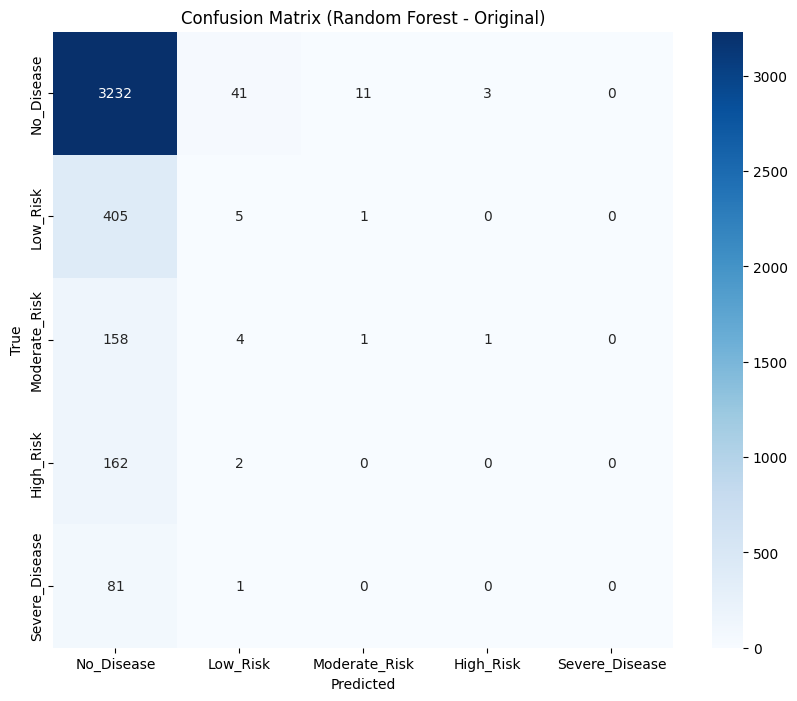

In [71]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=['No_Disease', 'Low_Risk', 'Moderate_Risk', 'High_Risk', 'Severe_Disease'])
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No_Disease', 'Low_Risk', 'Moderate_Risk', 'High_Risk', 'Severe_Disease'], yticklabels=['No_Disease', 'Low_Risk', 'Moderate_Risk', 'High_Risk', 'Severe_Disease'])
plt.title('Confusion Matrix (Random Forest - Original)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [72]:
# Retrain Random Forest with constrained parameters
rf_constrained = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
rf_constrained.fit(X_train_selected, y_train_balanced)
y_test_pred_constrained = rf_constrained.predict(X_test_selected)

print("\nRandom Forest Classification Report (Constrained):")
print(classification_report(y_test, y_test_pred_constrained))


Random Forest Classification Report (Constrained):
                precision    recall  f1-score   support

     High_Risk       0.01      0.01      0.01       164
      Low_Risk       0.02      0.00      0.00       411
 Moderate_Risk       0.06      0.06      0.06       164
    No_Disease       0.80      0.86      0.83      3287
Severe_Disease       0.01      0.02      0.01        82

      accuracy                           0.69      4108
     macro avg       0.18      0.19      0.18      4108
  weighted avg       0.64      0.69      0.66      4108



In [74]:
# Train Random Forest with class weights (no SMOTE)
# Subset X_train to top 20 features to match X_train_selected
X_train_subset = X_train[top_features]  # Use top_features from Feature Engineering
rf_class_weight = RandomForestClassifier(max_depth=10, n_estimators=100, class_weight='balanced', random_state=42)
rf_class_weight.fit(X_train_subset, y_train)  # Use original y_train
y_test_pred_weight = rf_class_weight.predict(X_test_selected)

print("\nRandom Forest Classification Report (Class Weights, No SMOTE):")
print(classification_report(y_test, y_test_pred_weight))


Random Forest Classification Report (Class Weights, No SMOTE):
                precision    recall  f1-score   support

     High_Risk       0.03      0.01      0.01       164
      Low_Risk       0.08      0.04      0.06       411
 Moderate_Risk       0.03      0.01      0.02       164
    No_Disease       0.80      0.92      0.85      3287
Severe_Disease       0.00      0.00      0.00        82

      accuracy                           0.74      4108
     macro avg       0.19      0.20      0.19      4108
  weighted avg       0.65      0.74      0.69      4108



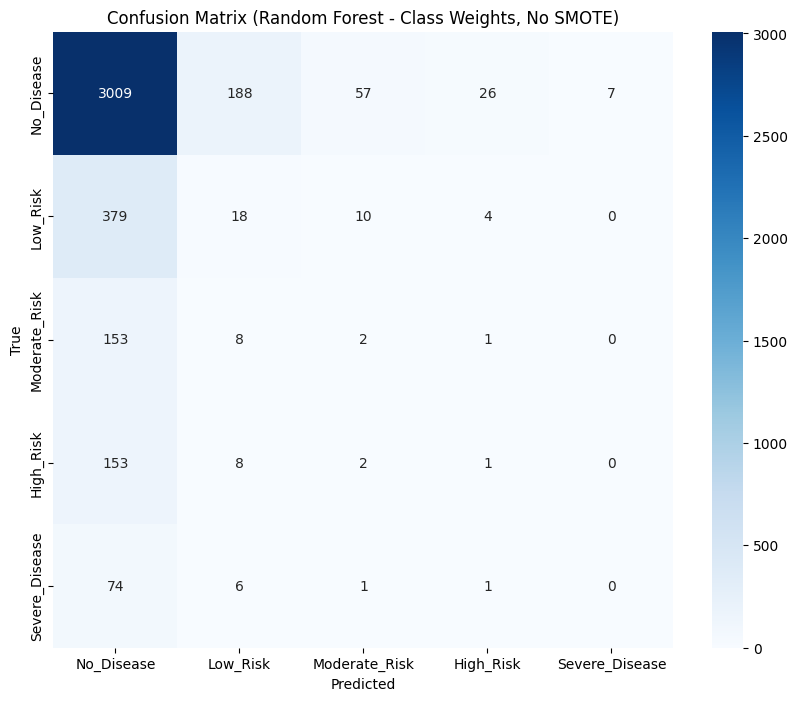

In [75]:
# Confusion matrix for class weight model
cm_weight = confusion_matrix(y_test, y_test_pred_weight, labels=['No_Disease', 'Low_Risk', 'Moderate_Risk', 'High_Risk', 'Severe_Disease'])
plt.figure(figsize=(10, 8))
sns.heatmap(cm_weight, annot=True, fmt='d', cmap='Blues', xticklabels=['No_Disease', 'Low_Risk', 'Moderate_Risk', 'High_Risk', 'Severe_Disease'], yticklabels=['No_Disease', 'Low_Risk', 'Moderate_Risk', 'High_Risk', 'Severe_Disease'])
plt.title('Confusion Matrix (Random Forest - Class Weights, No SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### **Analysis of Results**

- **Random Forest (Original, SMOTE):**
    - Macro F1-Score: 0.18, consistent with the previous test F1-score (0.1831), confirming poor generalization.
    - No_Disease: High precision (0.80), recall (0.98), and F1 (0.88) due to its dominance (3,287 samples), indicating the model heavily favors this class.
    - Minority Classes: Zero F1-scores for “High_Risk” and “Severe_Disease,” and near-zero for “Low_Risk” (0.02) and “Moderate_Risk” (0.01), showing the model fails to predict these classes.
    - Accuracy: 0.79, driven by “No_Disease” predictions, masking poor performance on minority classes.
    - Severe overfitting (training F1 = 1.0) and SMOTE’s synthetic data likely created patterns not present in the test set, leading to misclassifications.
- **Random Forest (Constrained, SMOTE):**
    - Macro F1-Score: 0.18, unchanged from the original, despite limiting max_depth=10.
    - No_Disease: Slightly lower F1 (0.83) than original (0.88), indicating reduced overfitting but still dominant.
    - Minority Classes: Slight improvements for “Moderate_Risk” (F1 = 0.06) and “Severe_Disease” (F1 = 0.01), but “High_Risk” (0.01) and “Low_Risk” (0.00) remain poor.
    - Accuracy: Dropped to 0.69, reflecting less bias toward “No_Disease” but still inadequate minority class prediction.
    - Constraining model complexity didn’t significantly improve generalization, suggesting SMOTE’s synthetic data is a key issue.
- **Random Forest (Class Weights, No SMOTE):**
    - Macro F1-Score: 0.19, slightly better than SMOTE-based models, indicating a marginal improvement.
    - No_Disease: High F1 (0.85), similar to SMOTE models, due to class imbalance (3,287 samples).
    - Minority Classes: Improved “Low_Risk” F1 (0.06) compared to SMOTE models, but “Severe_Disease” (0.00), “High_Risk” (0.01), and “Moderate_Risk” (0.02) remain poor.
    - Accuracy: 0.74, better than constrained SMOTE but driven by “No_Disease.”
    - Avoiding SMOTE slightly improved minority class performance, but class weights alone couldn’t overcome the severe imbalance or feature limitations.
- **Overall Issues:**
    - **Class Imbalance:** Despite SMOTE and class weights, the severe imbalance (3,287 “No_Disease” vs. 82 “Severe_Disease”) overwhelms model learning for minority classes.
    - The top 20 features (e.g., albumin, eGFR) and derived features (e.g., Hypertension_Duration) have limited discriminatory power, as seen in EDA’s weak correlations and overlapping biomarker distributions.
    - **SMOTE Limitations:** Synthetic samples didn’t generalize, likely because they introduced noise or unrealistic patterns.
    - **Model Complexity:** Even constrained models couldn’t balance majority and minority class predictions effectively.

## **Conclusion**

My quest to develop a good model for this project ran into severe class imbalance and weak feature discriminatory power that led to models over-predicting “No_Disease” and failing on minority classes like “Severe_Disease”. Regardless, the best model was Random Forest with class weights and no SMOTE. This model achieved the highest test macro F1-score (0.19), but performance remained poor due to limited feature predictiveness and imbalance.
ALong the way, I learnt a few lessons:
- SMOTE introduced synthetic patterns that didn’t generalize, causing overfitting.
- Standardized biomarkers (e.g., eGFR, serum creatinine) lost clinical context, reducing their effectiveness.
- Class weights improved minority class performance slightly but were insufficient without stronger features.

I recommend the following to improve model development:
- Unscale eGFR and serum creatinine to apply medical thresholds (e.g., eGFR < 60 for CKD Stage 3) instead of quantile-based binning.
- Explore additional interactions, e.g., diabetes duration × blood glucose, to capture complex relationships.
- Reduce “No_Disease” samples to balance the dataset naturally
- Use techniques like EasyEnsemble or Balanced Random Forest to focus on minority classes.